<a href="https://colab.research.google.com/github/avellar1975/DataScience/blob/main/jupyter_notebooks/Evandro_Ferreira_de_Avellar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/header_projeto.png' width=900>

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

<p>Analisar os impactos do COVID-19 no país sem olhar diretamente para os dados de contaminados e óbitos pode ser uma forma imparcial de verificar o quanto ela está afetando nossa socieade.</p>
<p>O objetivo deste estudo é analisar o comportamento mensal da quantidade de óbitos dos últimos 10 anos e descobrir se o COVID-19 realmente afetou a quantidade de óbitos mensais, ou se o COVID-19 acabou substituindo outras causas de morte, seja na redução de mortes por outras doenças seja pela possível redução de acidentes por conta do isolamento.</p>
<p>Por outro lado, a análise poderá demonstrar o impacto indireto da pandemia com um possível crescimento de óbitos por conta da complicação de outras doenças ameaçadas pelo colapso do sistema de saúde.</p>
<p>Acredito que o resultado trará uma evidência científica que ficará acima das convicções políticas, que infelizmente se misturam nessa grande crise de saúde.</p>

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

### Preparando a base do estudo

<p>Através do Shell no Linux o arquivo original foi reduzido para os últimos 10 anos.</p>
<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/bash.png' width=200>

```
$ head -1 obitos-registro-civil.csv > obitos_2010_2020.csv
$ tail -3451 obitos-registro-civil.csv >> obitos_2010_2020.csv
```

### Importando bibliotecas que serão utilizadas no estudo

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker

### Carregando nosso dataset

In [23]:
obitos = pd.read_csv('https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/obitos_2010_2020.csv')
obitos.head()

,year,month,state,deaths
0,2010,1,AC,79
1,2010,1,AL,557
2,2010,1,AP,149
3,2010,1,BA,666
4,2010,1,CE,146


In [24]:
for index, row in obitos.iterrows():
    if row['month'] < 10:
        row['month'] = '0' + str(row['month'])
    obitos.loc[index,'Ano/mês'] = str(row['year']) + '/' + str(row['month'])

obitos.head()

,year,month,state,deaths,Ano/mês
0,2010,1,AC,79,2010/01
1,2010,1,AL,557,2010/01
2,2010,1,AP,149,2010/01
3,2010,1,BA,666,2010/01
4,2010,1,CE,146,2010/01


In [27]:
obitos_agrupados = obitos[['Ano/mês', 'deaths']].groupby('Ano/mês').sum()
obitos_agrupados.tail()

,deaths
Ano/mês,
2020/04,112863
2020/05,130470
2020/06,132361
2020/07,136728
2020/08,126535


In [48]:
obitos_agrupados.info

<bound method DataFrame.info of          deaths
Ano/mês        
2010/01   53953
2010/02   51617
2010/03   57863
2010/04   55444
2010/05   56003
...         ...
2020/04  112863
2020/05  130470
2020/06  132361
2020/07  136728
2020/08  126535

[128 rows x 1 columns]>

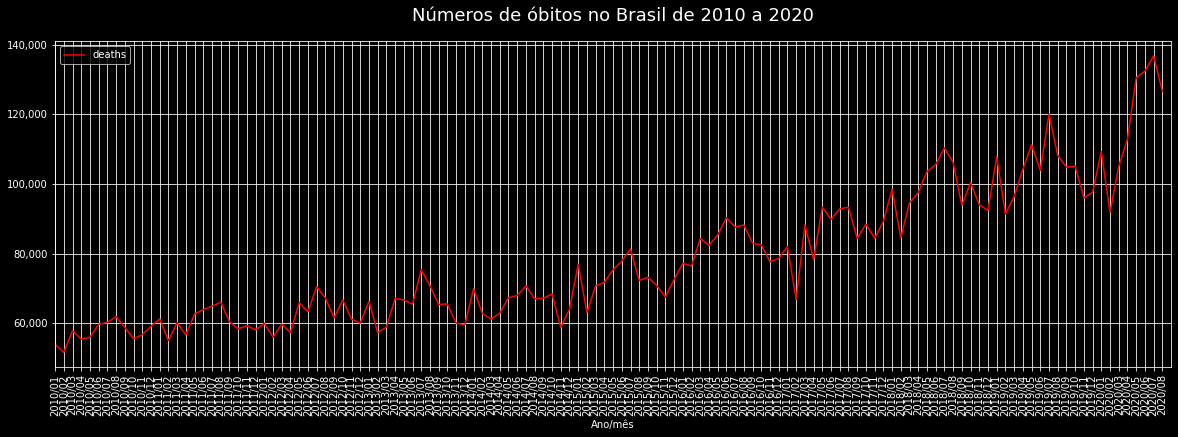

In [59]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = obitos_agrupados.plot(figsize=(20,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.xaxis
ax.set_title('Números de óbitos no Brasil de 2010 a 2020', fontsize=18, pad=20, color='white')

plt.xticks(rotation=90)
plt.xlim(0, 128)
ax.set_xticks(range(0,128))
ax.set_xticklabels(obitos_agrupados.T.columns)


plt.show()


In [56]:
obitos_5_anos = obitos_agrupados[60:]
obitos_5_anos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 2015/01 to 2020/08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   deaths  68 non-null     int64
dtypes: int64(1)
memory usage: 1.1+ KB


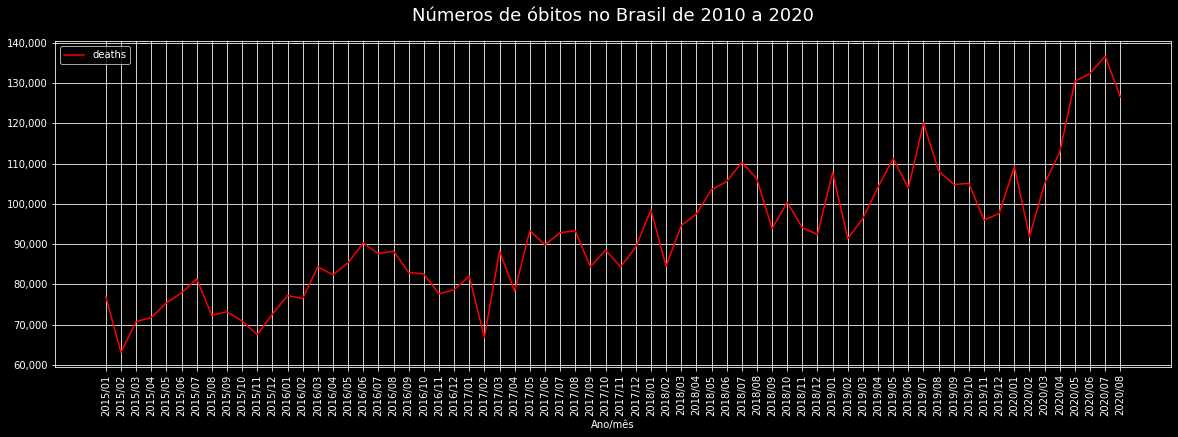

In [58]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = obitos_5_anos.plot(figsize=(20,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.xaxis
ax.set_title('Números de óbitos no Brasil de 2010 a 2020', fontsize=18, pad=20, color='white')

plt.xticks(rotation=90)
# plt.xlim(0, 68)
ax.set_xticks(range(0,68))
ax.set_xticklabels(obitos_5_anos.T.columns)


plt.show()

In [109]:
obitos_5_anos.head()

,deaths
Ano/mês,
2015/01,76965
2015/02,63067
2015/03,70752
2015/04,71731
2015/05,75382


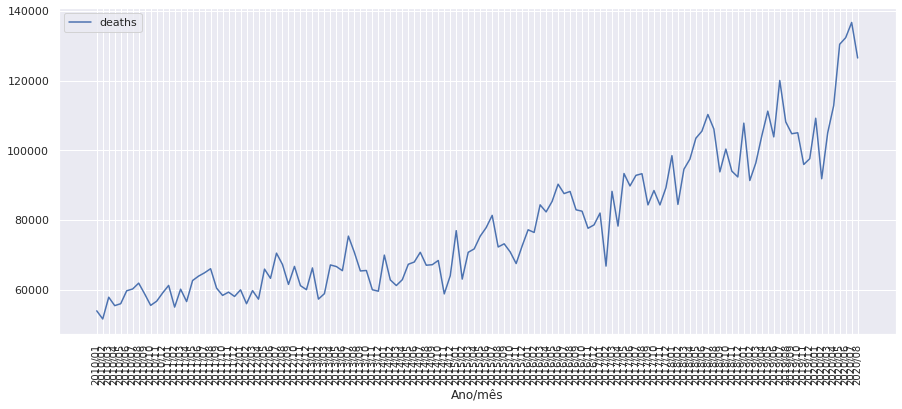

In [123]:
import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(15,6))
# Plot the responses for different events and regions

sns.lineplot(data=obitos_agrupados )

plt.xticks(rotation=90, fontsize=10)

plt.show()


In [136]:
obitos_julho = obitos.query('month == 2 or month == 7 ')

In [137]:
obitos_agrupados_julho = obitos_julho[['Ano/mês', 'deaths']].groupby('Ano/mês').sum()
obitos_agrupados_julho.tail()

,deaths
Ano/mês,
2018/07,110316
2019/02,91364
2019/07,120077
2020/02,91860
2020/07,136728


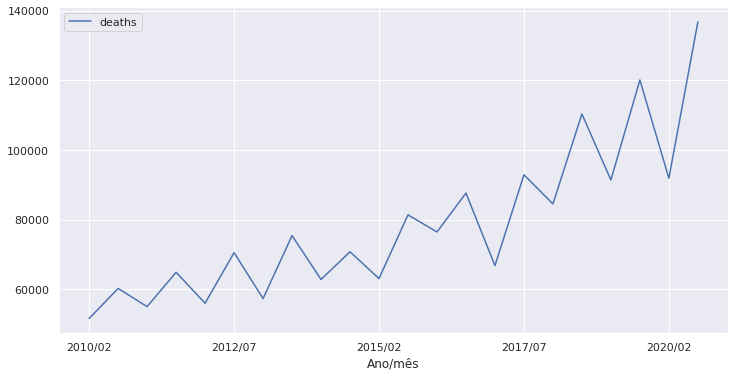

In [139]:
obitos_agrupados_julho.plot(figsize=(12,6))